# Análise de Sobrevivência em Pacientes com Cancer de Pulmao

O foco é modelar e interpretar fatores associados à sobrevivência de pacientes com câncer de pulmão, aplicando os modelos de Weibull e Cox e realizando uma análise de decomposição.

## Objetivo
Este projeto tem como objetivo analisar fatores associados à sobrevivência de pacientes com câncer de pulmão a partir do conjunto de dados cancer. Utilizando os modelos de Weibull e Cox, a análise busca identificar e interpretar os efeitos de variáveis preditoras (como idade, sexo e ingestão calórica) na sobrevivência dos pacientes, além de realizar uma decomposição para compreender a contribuição relativa de cada variável.

## Metodologia
1. Coleta e Preparação de Dados

- Carregar o conjunto de dados cancer usando data(cancer, package="survival"). Este conjunto de dados também está disponivel no endereço https://github.com/flavioluizseixas/aprendizado-de-maquina-na-saude/blob/main/5-ModeloSobreviv%C3%AAncia/data/cancer_data.csv
- Explorar e preparar os dados, removendo valores ausentes e fazendo uma análise descritiva das variáveis relevantes (tempo de sobrevivência, status de censura, idade, sexo, ingestão calórica diária, entre outros).
- As seguintes variáveis estão presentes no dataset
  - inst: Institution code
  - time: Survival time in days
  - status: censoring status 1=censored, 2=dead
  - age: Age in years
  - sex: Male=1 Female=2
  - ph.ecog: ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulator
  - ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
  - pat.karno: Karnofsky performance score as rated by patient
  - meal.cal: Calories consumed at meals
  - wt.loss: Weight loss in last six months (pounds)

3. Análise de Kaplan-Meier

- Realizar uma análise de sobrevivência Kaplan-Meier para estimar as curvas de sobrevivência dos pacientes, categorizados por variáveis como sexo.
- Visualizar as curvas Kaplan-Meier e interpretar as diferenças na sobrevivência entre os grupos.
Modelagem de Sobrevivência

4. Análise de Decomposição

- Aplicar uma análise de decomposição para avaliar a contribuição relativa de cada variável preditora nos modelos de Weibull e Cox.
- Interpretar como cada preditor influencia o risco e o tempo de sobrevivência dos pacientes, utilizando gráficos de efeitos marginais e curvas de sobrevivênci

5. Visualização e Interpretação

- Visualizar os resultados das análises de sobrevivência e decomposição usando gráficos que representem as curvas de sobrevivência para diferentes grupos e os efeitos das variáveis preditoras.
- Comparar e interpretar os efeitos dos preditores nos modelos de Weibull e Cox, discutindo as implicações clínicas.

In [ ]:
# Intalando o pacote equivalente a "survival" do R.
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b875104bf7c9eae687ebf67a7af4fae079029fe7b590832b0e61d24f63ec8800
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lifelines

# 1. Coleta e tratamento dos dados

In [ ]:
# Carregar o dataset
caminho = "/content/cancer_data.csv"
data = pd.read_csv(caminho)

# Exibir as primeiras linhas do dataset
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
# colunas com valores vazios
list(data.columns[(data.isnull().sum()>0)])

['inst', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']

In [ ]:
# removendo registros com valores vazios
data.dropna(inplace=True)

In [ ]:
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [ ]:
# Dados faltantes removidos.
data.isnull().sum()

,0
inst,0
time,0
status,0
age,0
sex,0
ph.ecog,0
ph.karno,0
pat.karno,0
meal.cal,0
wt.loss,0


In [ ]:
data.shape

(167, 10)

In [ ]:
data.describe()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,10.706587,309.934132,1.718563,62.568862,1.383234,0.958084,82.035928,79.580838,929.125749,9.718563
std,8.167900,209.435591,0.451053,9.210706,0.487637,0.731011,12.778885,15.104188,413.489837,13.378587
min,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,3.000000,174.500000,1.000000,57.000000,1.000000,0.000000,70.000000,70.000000,619.000000,0.000000
50%,11.000000,268.000000,2.000000,64.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,15.000000,419.500000,2.000000,70.000000,2.000000,1.000000,90.000000,90.000000,1162.500000,15.000000
max,32.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


In [ ]:
# Renomeando a variável "status" para 0's e 1's
data.status.replace({1: 0, 2: 1}, inplace=True)

<ipython-input-29-c8edd360167a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.status.replace({1: 0, 2: 1}, inplace=True)


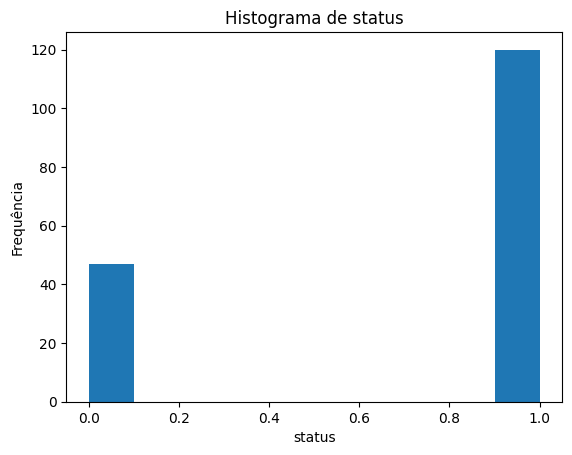

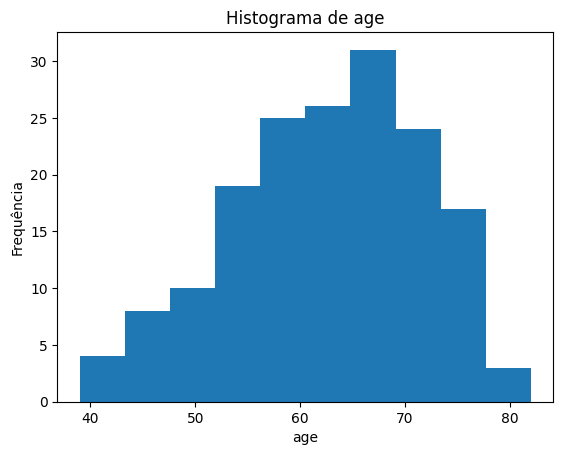

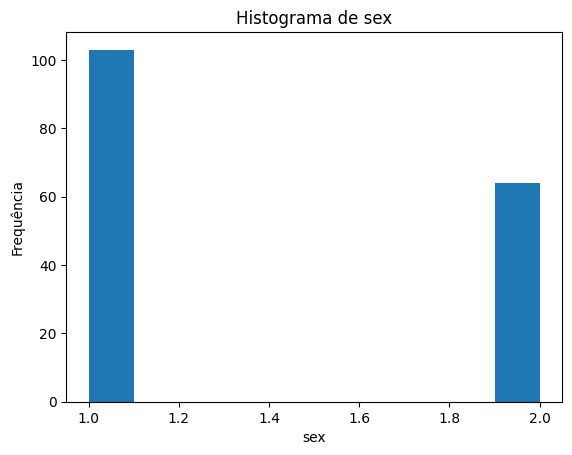

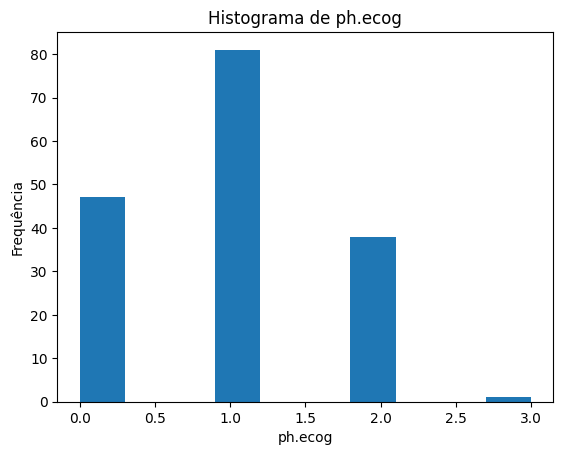

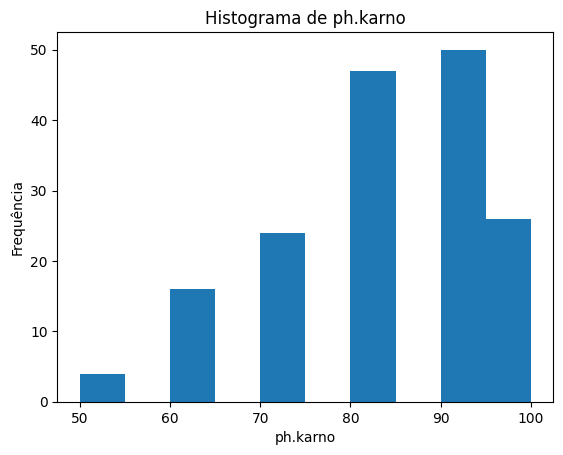

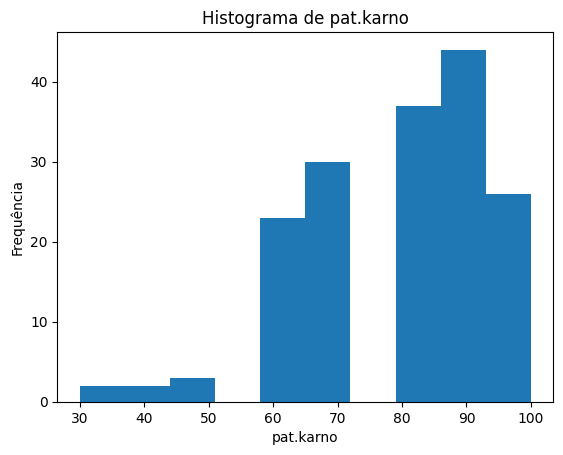

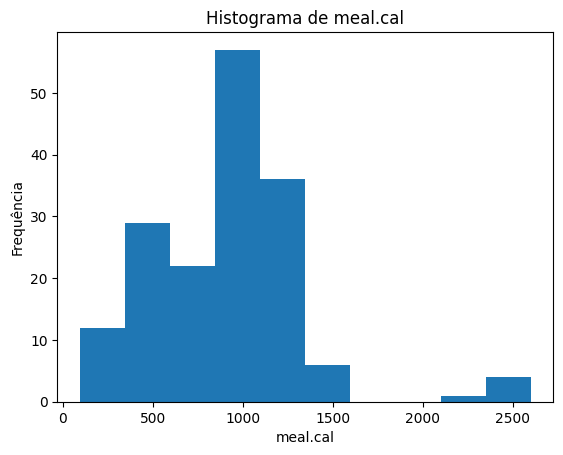

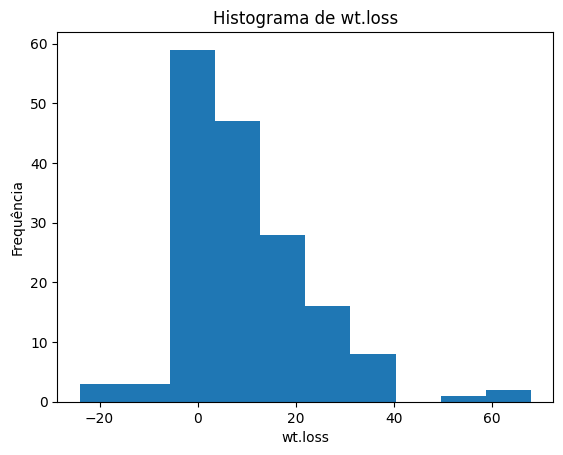

In [ ]:
# Primeira visualizações de cada variável preditora
colunas_preditoras = ['status',	'age',	'sex',	'ph.ecog', 'ph.karno',	'pat.karno',	'meal.cal',	'wt.loss'	]
for coluna in colunas_preditoras:
  plt.hist(data[coluna])
  plt.title(f'Histograma de {coluna}')
  plt.xlabel(coluna)
  plt.ylabel('Frequência')
  plt.show()

# 3. Análise das curvas Kaplan-Meier

In [ ]:
data.status.value_counts()

,count
status,
1,120
0,47


          KM_estimate
timeline             
0.0          1.000000
5.0          0.994012
11.0         0.988024
12.0         0.982036
13.0         0.976048
...               ...
814.0        0.061903
821.0        0.061903
840.0        0.061903
965.0        0.061903
1022.0       0.061903

[150 rows x 1 columns]


<Axes: title={'center': 'Curva de Sobrevivência Kaplan-Meier'}, xlabel='Tempo', ylabel='Probabilidade de Sobrevivência'>

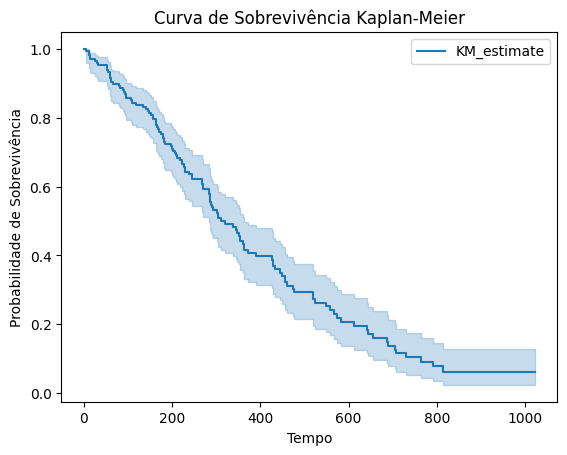

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter

# Dados duração e evento (1 = morte, 0 = censurado)
df = pd.DataFrame(data[['time','status']])

# Criando o estimador Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustando os dados
kmf.fit(durations=df["time"], event_observed=df["status"])

# Resumo dos resultados
print(kmf.survival_function_)

# Plotando a curva de sobrevivência
kmf.plot(title="Curva de Sobrevivência Kaplan-Meier", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")


<Axes: title={'center': 'Comparação de Grupos'}, xlabel='timeline'>

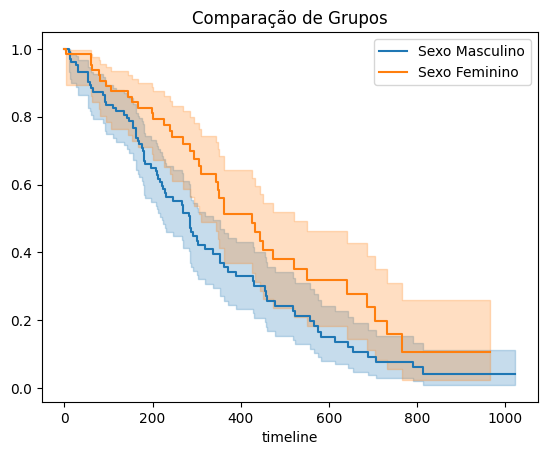

In [ ]:
# Separando os sexos
df_sex = pd.DataFrame(data[['time','status','sex']])
group_a = df_sex[df_sex["sex"] == 1]
group_b = df_sex[df_sex["sex"] == 2]

# Estimando as curvas Kaplan-Meier para os dois grupos
kmf_a = KaplanMeierFitter().fit(group_a["time"], group_a["status"], label="Sexo Masculino")
kmf_b = KaplanMeierFitter().fit(group_b["time"], group_b["status"], label="Sexo Feminino")

# Plotando as curvas
ax = kmf_a.plot()
kmf_b.plot(ax=ax, title="Comparação de Grupos")

<Axes: title={'center': 'Comparação de Grupos'}, xlabel='timeline'>

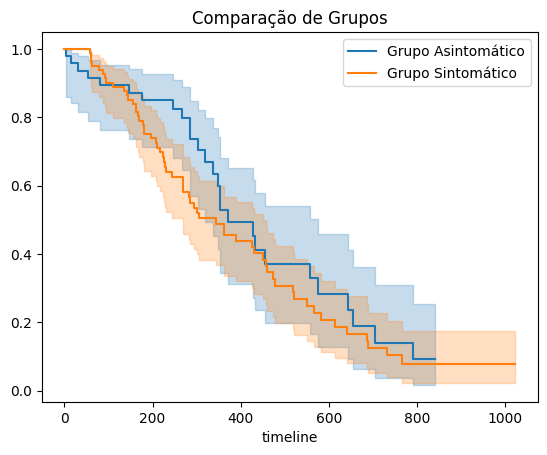

In [ ]:
# Separando os grupo:  0=asymptomatic, 1= symptomatic but completely ambulator
df_ecog = pd.DataFrame(data[['time','status','ph.ecog']])
group_a = df_ecog[df_ecog["ph.ecog"] == 0]
group_b = df_ecog[df_ecog["ph.ecog"] == 1]

# Estimando as curvas Kaplan-Meier para os dois grupos
kmf_a = KaplanMeierFitter().fit(group_a["time"], group_a["status"], label="Grupo Asintomático")
kmf_b = KaplanMeierFitter().fit(group_b["time"], group_b["status"], label="Grupo Sintomático")

# Plotando as curvas
ax = kmf_a.plot()
kmf_b.plot(ax=ax, title="Comparação de Grupos")

In [ ]:
# Mediana dos valores
data['ph.karno'].quantile(0.5)

80.0

<Axes: title={'center': 'Comparação de Grupos'}, xlabel='timeline'>

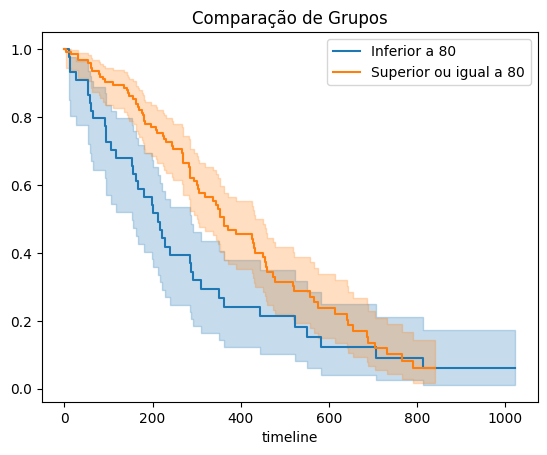

In [ ]:
# Separando os grupo:  bad=0-good=100
df_karno = pd.DataFrame(data[['time','status','ph.karno']])
group_a = df_karno[df_karno["ph.karno"] < 80]
group_b = df_karno[df_karno["ph.karno"] >= 80]

# Estimando as curvas Kaplan-Meier para os dois grupos
kmf_a = KaplanMeierFitter().fit(group_a["time"], group_a["status"], label="Inferior a 80")
kmf_b = KaplanMeierFitter().fit(group_b["time"], group_b["status"], label="Superior ou igual a 80")

# Plotando as curvas
ax = kmf_a.plot()
kmf_b.plot(ax=ax, title="Comparação de Grupos")

In [ ]:
# Mediana dos valores
data['pat.karno'].quantile(0.5)

80.0

<Axes: title={'center': 'Comparação de Grupos'}, xlabel='timeline'>

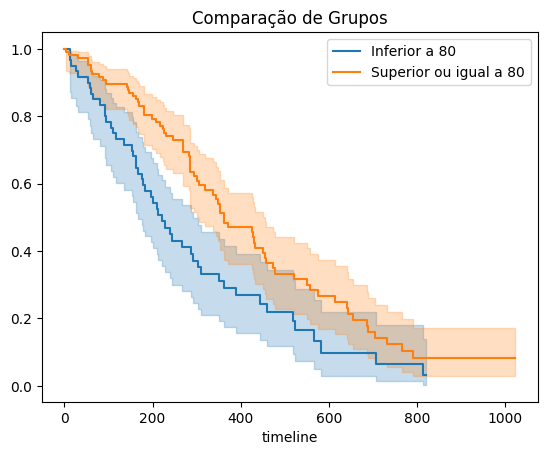

In [ ]:
# Separando os grupo:  bad=0-good=100
df_karno_pat = pd.DataFrame(data[['time','status','pat.karno']])
group_a = df_karno_pat[df_karno_pat["pat.karno"] < 80]
group_b = df_karno_pat[df_karno_pat["pat.karno"] >= 80]

# Estimando as curvas Kaplan-Meier para os dois grupos
kmf_a = KaplanMeierFitter().fit(group_a["time"], group_a["status"], label="Inferior a 80")
kmf_b = KaplanMeierFitter().fit(group_b["time"], group_b["status"], label="Superior ou igual a 80")

# Plotando as curvas
ax = kmf_a.plot()
kmf_b.plot(ax=ax, title="Comparação de Grupos")

In [ ]:
# Mediana das calorias consumidas
data['meal.cal'].quantile(0.5)

975.0

<Axes: title={'center': 'Comparação de Grupos'}, xlabel='timeline'>

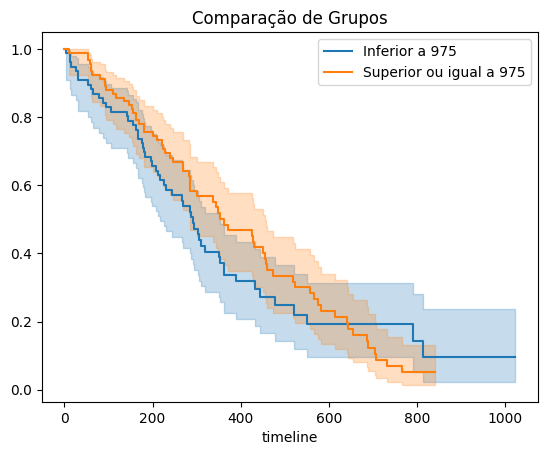

In [ ]:
# Separando os grupo por consumo de calorias:
df_cal = pd.DataFrame(data[['time','status','meal.cal']])
group_a = df_cal[df_cal["meal.cal"] < 975]
group_b = df_cal[df_cal["meal.cal"] >= 975]

# Estimando as curvas Kaplan-Meier para os dois grupos
kmf_a = KaplanMeierFitter().fit(group_a["time"], group_a["status"], label="Inferior a 975")
kmf_b = KaplanMeierFitter().fit(group_b["time"], group_b["status"], label="Superior ou igual a 975")

# Plotando as curvas
ax = kmf_a.plot()
kmf_b.plot(ax=ax, title="Comparação de Grupos")

In [ ]:
# Mediana dos pesos perdidos
data['wt.loss'].quantile(0.5)

7.0

<Axes: title={'center': 'Comparação de Grupos'}, xlabel='timeline'>

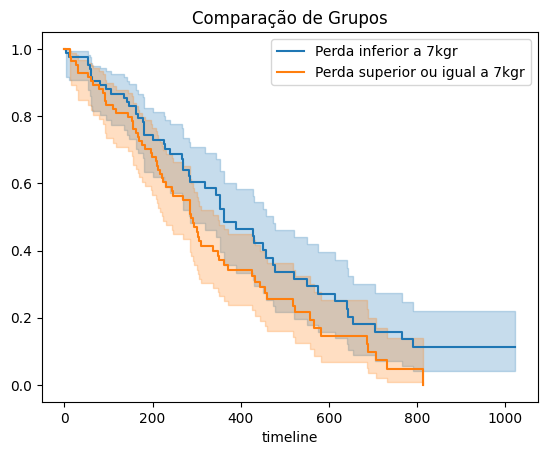

In [ ]:
# Separando os grupo por peso perdido:
df_wt = pd.DataFrame(data[['time','status','wt.loss']])
group_a = df_wt[df_wt["wt.loss"] < 7]
group_b = df_wt[df_wt["wt.loss"] >= 7]

# Estimando as curvas Kaplan-Meier para os dois grupos
kmf_a = KaplanMeierFitter().fit(group_a["time"], group_a["status"], label="Perda inferior a 7kgr")
kmf_b = KaplanMeierFitter().fit(group_b["time"], group_b["status"], label="Perda superior ou igual a 7kgr")

# Plotando as curvas
ax = kmf_a.plot()
kmf_b.plot(ax=ax, title="Comparação de Grupos")

## Interpretação
Diretamente dos gráficos podemos afirmar que, para os pacientes com cancer de pulmão, existem evidências de menores probabilidades de sobrevivência nos os grupos do sexo masculino, com menos ingesta calórica, menor score Karnofsky, menor score ECOG ou maior perda de peso.

# 4. Análise de decomposição de de Weibull e Cox

In [ ]:
from lifelines import WeibullFitter, CoxPHFitter

In [ ]:
data = data.astype(  {'sex': 'category', 'ph.ecog': 'category'})


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 1 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   inst       167 non-null    float64 
 1   time       167 non-null    int64   
 2   status     167 non-null    int64   
 3   age        167 non-null    int64   
 4   sex        167 non-null    category
 5   ph.ecog    167 non-null    category
 6   ph.karno   167 non-null    float64 
 7   pat.karno  167 non-null    float64 
 8   meal.cal   167 non-null    float64 
 9   wt.loss    167 non-null    float64 
dtypes: category(2), float64(5), int64(3)
memory usage: 16.5 KB


<Axes: xlabel='log(HR) (95% CI)'>

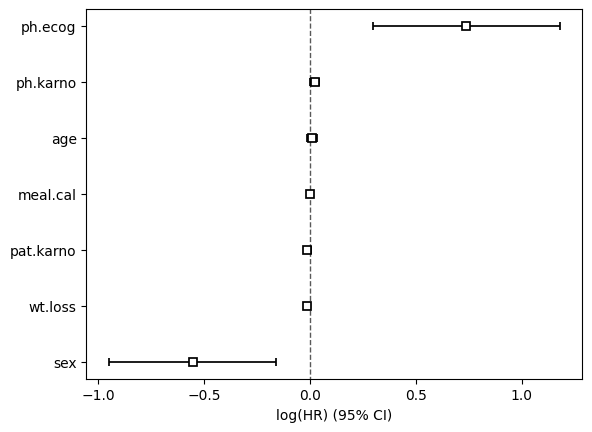

In [ ]:
from lifelines import CoxPHFitter

cat_cols = ['sex','ph.ecog']
num_cols = ['age', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']

df = data[['time']+cat_cols+num_cols+['status']]

# Ajustando o modelo de Cox
cph = CoxPHFitter()
cph.fit(df, duration_col="time", event_col="status")

# Visualizando o impacto das covariáveis
cph.plot()

## Interpretação do gráfico de Cox
1. Altos valores de ph.ecog estão associados a um maior risco de ocorrência do evento (pior prognóstico).
2. As variáveis age, meal.cal, ph.karno, pat.karno e wt.loss possuim coeficientes próximos de 0 com IC cruzando a linha pontilhada:
Essas variáveis não são estatisticamente significativas no modelo, ou seja, não há evidências suficientes de que essas variáveis influenciem o risco de forma clara.
3. O sexo está associado a um menor risco para um dos grupos, por exemplo, o grupo feminino pode ter maior sobrevivência.


### Modelo de Weibull

<Axes: title={'center': 'Função de Sobrevivência Weibull'}, xlabel='Tempo', ylabel='Probabilidade de Sobrevivência'>

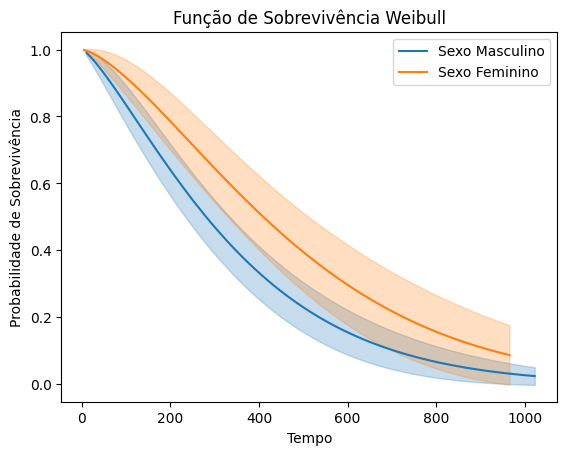

In [ ]:
from lifelines import WeibullFitter

group_a = df_sex[df_sex["sex"] == 1]
group_b = df_sex[df_sex["sex"] == 2]

# Estimando as curvas do modelo de WeiBull para os dois grupos
kmf_a = WeibullFitter().fit(group_a["time"], group_a["status"], label="Sexo Masculino")
kmf_b = WeibullFitter().fit(group_b["time"], group_b["status"], label="Sexo Feminino")

# Plotando a função de sobrevivência ajustada
kmf_a.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")
kmf_b.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")

<Axes: title={'center': 'Função de Sobrevivência Weibull'}, xlabel='Tempo', ylabel='Probabilidade de Sobrevivência'>

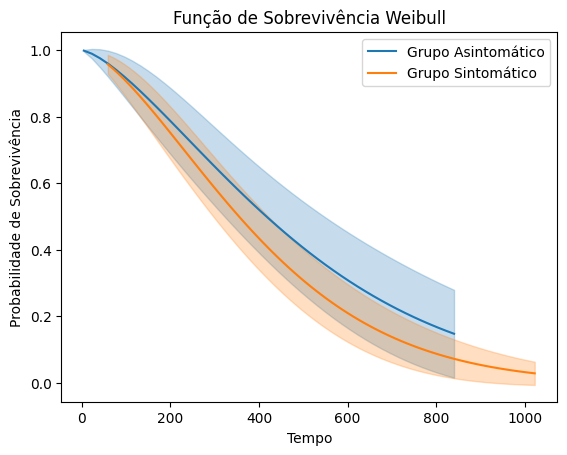

In [ ]:
group_a = df_ecog[df_ecog["ph.ecog"] == 0]
group_b = df_ecog[df_ecog["ph.ecog"] == 1]

# Estimando as curvas Weibull para os dois grupos
kmf_a = WeibullFitter().fit(group_a["time"], group_a["status"], label="Grupo Asintomático")
kmf_b = WeibullFitter().fit(group_b["time"], group_b["status"], label="Grupo Sintomático")

# Plotando a função de sobrevivência ajustada
kmf_a.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")
kmf_b.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")

<Axes: title={'center': 'Função de Sobrevivência Weibull'}, xlabel='Tempo', ylabel='Probabilidade de Sobrevivência'>

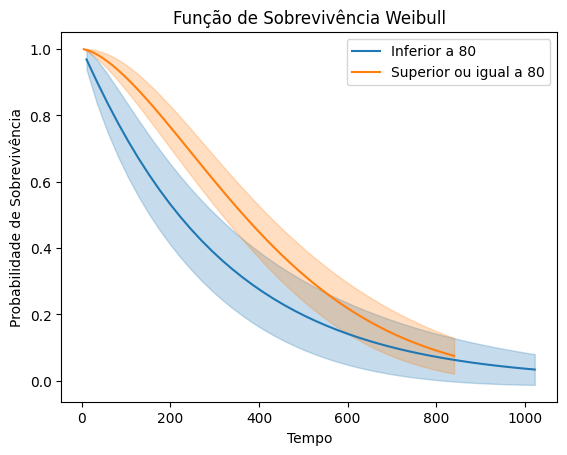

In [ ]:
group_a = df_karno[df_karno["ph.karno"] < 80]
group_b = df_karno[df_karno["ph.karno"] >= 80]

# Estimando as curvas Weibull para os dois grupos
kmf_a = WeibullFitter().fit(group_a["time"], group_a["status"], label="Inferior a 80")
kmf_b = WeibullFitter().fit(group_b["time"], group_b["status"], label="Superior ou igual a 80")

# Plotando a função de sobrevivência ajustada
kmf_a.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")
kmf_b.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")

<Axes: title={'center': 'Função de Sobrevivência Weibull'}, xlabel='Tempo', ylabel='Probabilidade de Sobrevivência'>

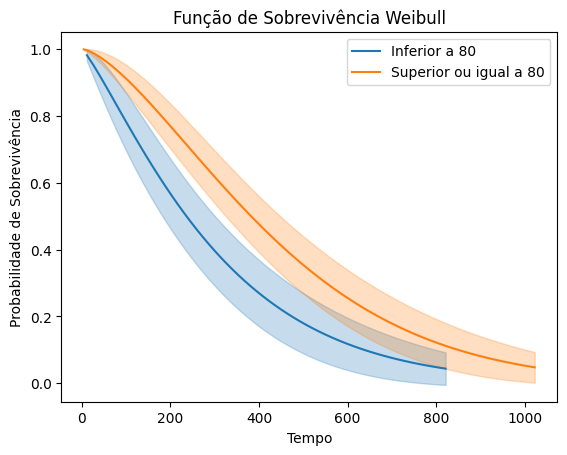

In [ ]:
group_a = df_karno_pat[df_karno_pat["pat.karno"] < 80]
group_b = df_karno_pat[df_karno_pat["pat.karno"] >= 80]

# Estimando as curvas Weibull para os dois grupos
kmf_a = WeibullFitter().fit(group_a["time"], group_a["status"], label="Inferior a 80")
kmf_b = WeibullFitter().fit(group_b["time"], group_b["status"], label="Superior ou igual a 80")

# Plotando a função de sobrevivência ajustada
kmf_a.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")
kmf_b.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")


<Axes: title={'center': 'Função de Sobrevivência Weibull'}, xlabel='Tempo', ylabel='Probabilidade de Sobrevivência'>

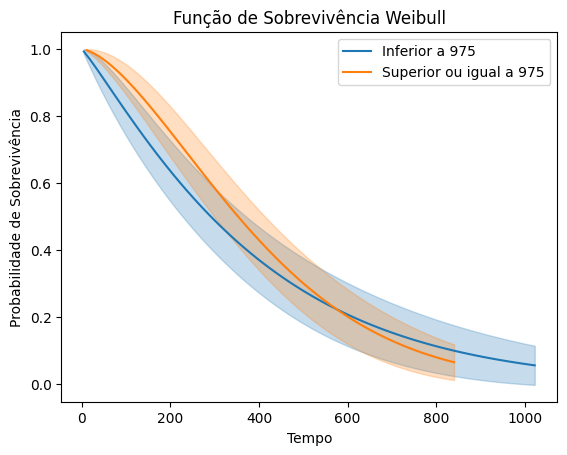

In [ ]:
group_a = df_cal[df_cal["meal.cal"] < 975]
group_b = df_cal[df_cal["meal.cal"] >= 975]

# Estimando as curvas Weibull para os dois grupos
kmf_a = WeibullFitter().fit(group_a["time"], group_a["status"], label="Inferior a 975")
kmf_b = WeibullFitter().fit(group_b["time"], group_b["status"], label="Superior ou igual a 975")

# Plotando a função de sobrevivência ajustada
kmf_a.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")
kmf_b.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")

<Axes: title={'center': 'Função de Sobrevivência Weibull'}, xlabel='Tempo', ylabel='Probabilidade de Sobrevivência'>

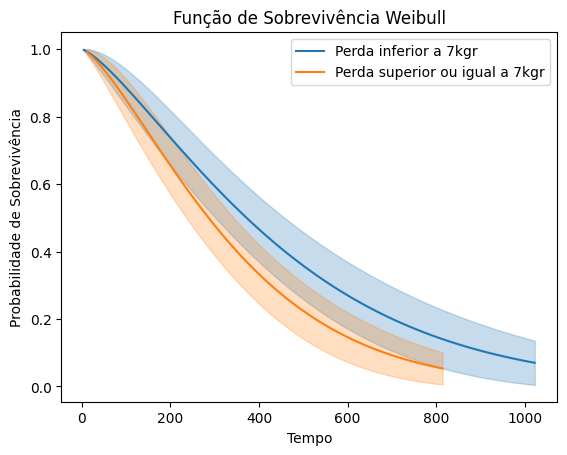

In [ ]:
group_a = df_wt[df_wt["wt.loss"] < 7]
group_b = df_wt[df_wt["wt.loss"] >= 7]

# Estimando as curvas Kaplan-Meier para os dois grupos
kmf_a = WeibullFitter().fit(group_a["time"], group_a["status"], label="Perda inferior a 7kgr")
kmf_b = WeibullFitter().fit(group_b["time"], group_b["status"], label="Perda superior ou igual a 7kgr")

# Plotando a função de sobrevivência ajustada
kmf_a.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")
kmf_b.plot_survival_function(title="Função de Sobrevivência Weibull", xlabel="Tempo", ylabel="Probabilidade de Sobrevivência")

Observamos que os gráficos do modelo de Weibull informam a mesma previsão do modelo de Kaplan-Meier para cada um dos grupos de comparação.